In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.keras.datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [3]:
(X_train,y_train), (X_test ,y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
X_train.shape  #50000 IMAGES with 32x32 

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

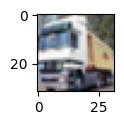

In [8]:
plot_sample(1)

In [9]:
X_train[0:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [10]:
classes = ["airplane", "automobile" ,"bird","cat", "deer", "dog" ,"frog", "horse", "ship",  "truck"]

In [11]:
y_train[3]

array([4], dtype=uint8)

In [12]:
classes[y_train[3][0]]

'deer'

In [25]:
X_train_scaled = X_train/255  #Scaling is done to improve the performance of our model. We divide our training samples by 255 because the values in each image are from range 0-255. it will convert them in a range between 0-1
X_test_scaled = X_test/255

In [14]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
# Now we do one hot conding to convert it into categorical values. For example in the above line It will create an array of 10 for 6 where 6 will be 1 while remaining will be zero.

In [16]:
y_train_categorical = keras.utils.to_categorical(
y_train , num_classes = 10, dtype = "float32"
)

In [17]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
y_test_categorical = keras.utils.to_categorical(
y_test , num_classes = 10, dtype = "float32"
)

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),  #we use sigmoid in the output layer because its better with classification
    keras.layers.Dense(3000,activation = 'relu'),
    keras.layers.Dense(1000,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
model.compile(optimizer = 'SGD' ,  #SGD because dataset is larger and its good with larger datasets
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(X_train_scaled, y_train_categorical, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 61s 38ms/step - loss: 1.8116 - accuracy: 0.3548
Epoch 2/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.6218 - accuracy: 0.4257
Epoch 3/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.5389 - accuracy: 0.4576
Epoch 4/5
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4769 - accuracy: 0.4821
Epoch 5/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4299 - accuracy: 0.4991


In [22]:
classes[y_test[0][0]]

'cat'

In [27]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 4s 13ms/step


3